In [1]:
import sys
sys.path.insert(0, '../')
import numpy as np
import data_loader as dl
from visual import display

In [2]:
dir = '/Users/julian/temp/vessels_tests'
clinical_inputs, ct_inputs, ct_lesion_GT, mri_inputs, mri_lesion_GT, brain_masks, ids, params = dl.load_structured_data(dir, 'data_set.npz')
test = np.squeeze(ct_inputs[0])
test_GT = ct_lesion_GT[0]
test.shape


Loading a total of 113 subjects.
Sequences used: {'ct_sequences': ['wmask_filtered_extracted_betted_Angio'], 'ct_label_sequences': ['wcoreg_VOI'], 'mri_sequences': [], 'mri_label_sequences': []}
0 subjects had been excluded.


(79, 95, 79)

Image center:  39 47 39
Image center value:  3.0


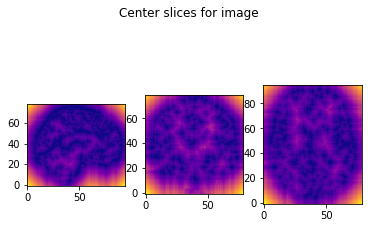

In [3]:
import persistance.filtrations as filters

# Apply 3 dilation filter
filtered_test = filters.thickening_3D(test)
display(filtered_test)



Image center:  39 47 39
Image center value:  1.0
Image center:  39 47 39
Image center value:  0.0


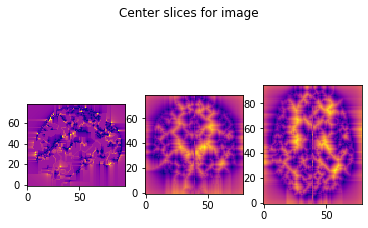

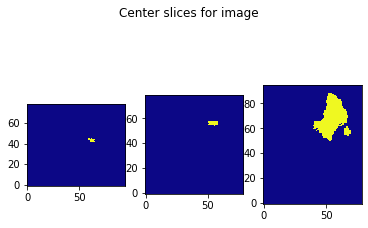

In [4]:
from utils.controlateral_normalisation import normalise_by_contralateral_region

# Normalize by controlateral region
norm_filtered_test = normalise_by_contralateral_region(filtered_test)

display(norm_filtered_test)
display(test_GT)


In [12]:
import persistance.barcodes as bars
import gudhi

cplx = gudhi.CubicalComplex(dimensions = filtered_test.shape, top_dimensional_cells = filtered_test.flatten(order="F"))
b = bars.barcode(filtered_test)


In [19]:
print(cplx.num_simplices())
len(b)

4828671


7382

Deprecated parameter. It has been replaced by max_intervals


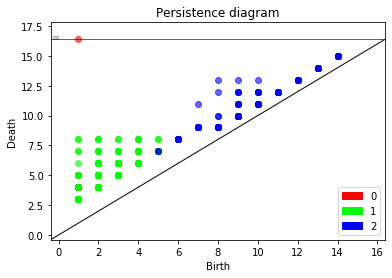

In [11]:
bars.barcode_plot(b)
